# <U> Problem 1 for the Data Set : Shoesales.csv <U>

# You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.

In [1]:
##importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
py.init_notebook_mode()
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


import os
os.getcwd()
os.chdir('C:\\Users\\harih\\Downloads\\Time Series Forecasting\\alt project')

### 1.1 Read the data as an appropriate Time Series data and plot the data.

In [2]:
ssdf = pd.read_csv("shoesales.csv",parse_dates=True,squeeze=True,index_col=0)
ssdf = pd.DataFrame(ssdf)

In [3]:
ssdf.head(2)

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89

In [4]:
ssdf.tail(2)

Shoe_Sales
YearMonth             
1995-06-01         220
1995-07-01         274

In [5]:
ssdf.shape

(187, 1)

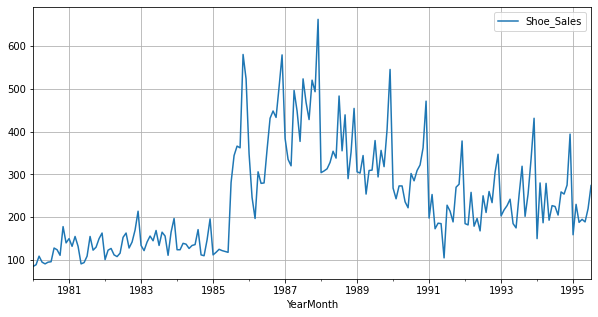

In [6]:
ssdf.plot(figsize=(10,5))
plt.grid();

In [7]:
ssdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [8]:
ssdf.isnull().sum().sum() 

0

- No null values

In [9]:
ssdf.describe

<bound method NDFrame.describe of             Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
...                ...
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

[187 rows x 1 columns]>

In [10]:
ssdf['Year']=ssdf.index.year
ssdf['Month']=ssdf.index.month
ssdf.head()

Shoe_Sales  Year  Month
YearMonth                          
1980-01-01          85  1980      1
1980-02-01          89  1980      2
1980-03-01         109  1980      3
1980-04-01          95  1980      4
1980-05-01          91  1980      5

In [11]:
ssdf.columns=['Sales', 'Year', 'Month']

print ('**Head of the given Dataset**')
print(ssdf.head())

print ('**Tail of the given Dataset**')
print(ssdf.tail())

**Head of the given Dataset**
            Sales  Year  Month
YearMonth                     
1980-01-01     85  1980      1
1980-02-01     89  1980      2
1980-03-01    109  1980      3
1980-04-01     95  1980      4
1980-05-01     91  1980      5
**Tail of the given Dataset**
            Sales  Year  Month
YearMonth                     
1995-03-01    188  1995      3
1995-04-01    195  1995      4
1995-05-01    189  1995      5
1995-06-01    220  1995      6
1995-07-01    274  1995      7


### 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Performing EDA

In [12]:
ssdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int64
 2   Month   187 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


In [13]:
ssdf.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

In [14]:
ssdf.describe().T

count         mean         std     min     25%     50%     75%     max
Sales  187.0   245.636364  121.390804    85.0   143.5   220.0   315.5   662.0
Year   187.0  1987.299465    4.514749  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.406417    3.450972     1.0     3.0     6.0     9.0    12.0

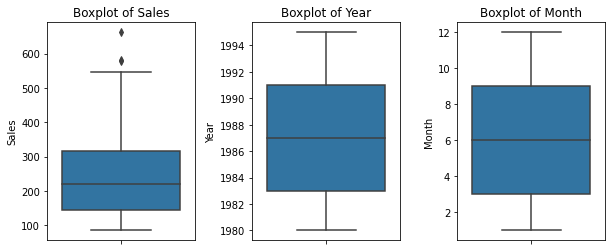

In [15]:
ssdf_boxplot=ssdf
plt.figure(figsize = (20,10))
feature_list = ssdf_boxplot.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = ssdf_boxplot[feature_list[i]], data = ssdf_boxplot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

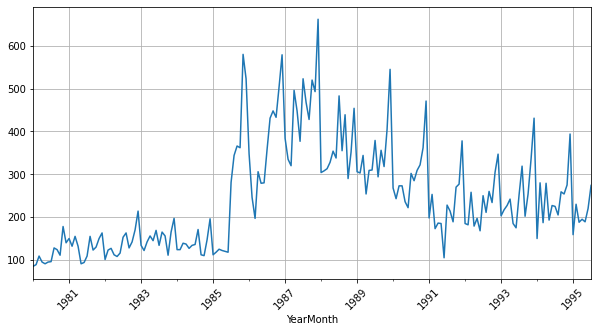

In [16]:
plt.figure(figsize=(10,5))
ssdf['Sales'].plot();
plt.xticks(rotation=45)
plt.grid();

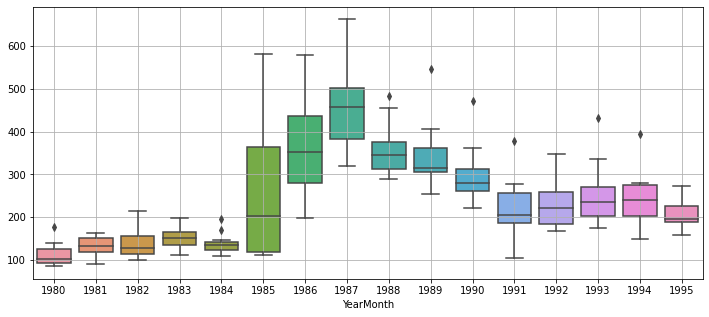

In [17]:
#Boxplot for year

_, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = ssdf.index.year,y = ssdf.values[:,0],ax=ax)
plt.grid();

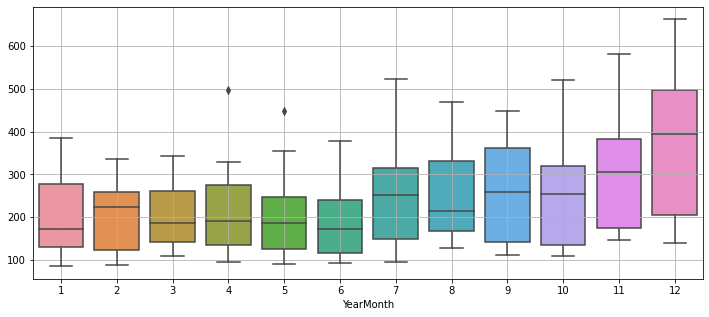

In [18]:
#Monthy Boxplot

_, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = ssdf.index.month,y = ssdf.values[:,0],ax=ax)
plt.grid();

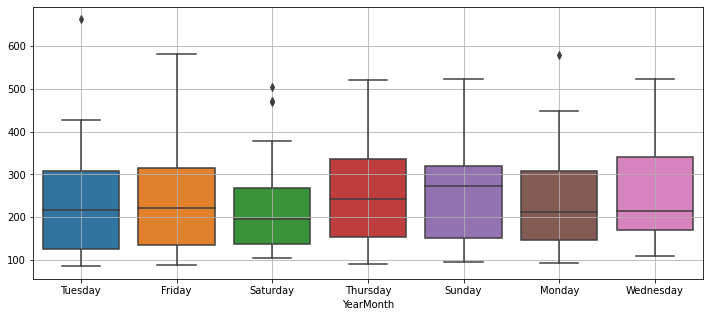

In [19]:
# Weekly Boxplot

_, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = ssdf.index.day_name(),y = ssdf.values[:,0],ax=ax)
plt.grid();

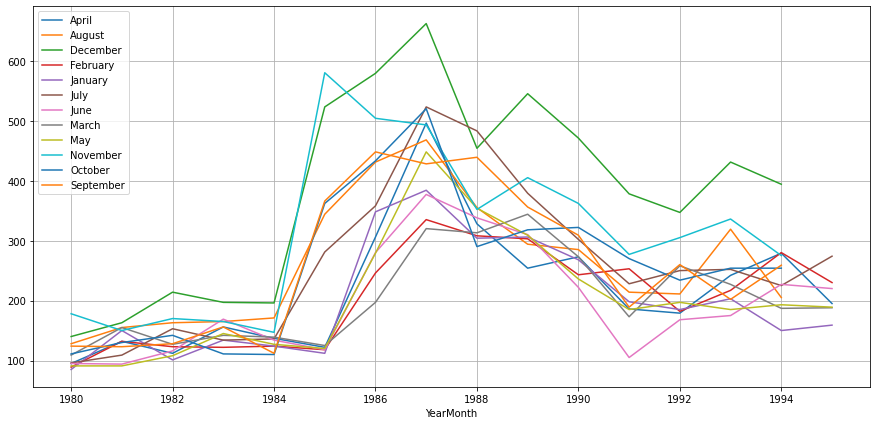

In [20]:
monthly_sales_across_years = pd.pivot_table(ssdf, values = 'Sales', columns = ssdf.index.month_name(), index = ssdf.index.year)
monthly_sales_across_years.plot(figsize=(15,7))
plt.grid()
plt.legend(loc='best');

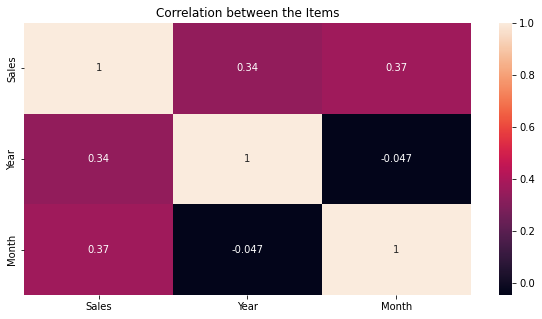

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(ssdf.corr(),annot=True)
plt.title('Correlation between the Items');
plt.show()

In [22]:
ssdf_decade_sum = ssdf.resample('10Y').sum()
ssdf_decade_sum

Sales    Year  Month
YearMonth                       
1980-12-31   1341   23760     78
1990-12-31  31735  238260    780
2000-12-31  12858  109605    340

#### ECDF Plot :::. Empirical Cumulative Distribution Function

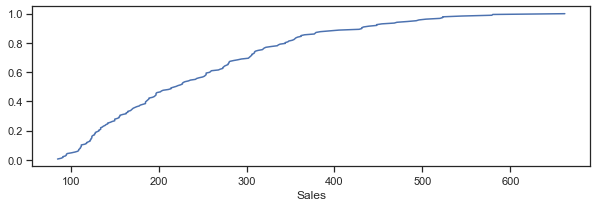

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks") 
plt.figure(figsize = (10,10))

plt.subplot(312)
ecdf = ECDF(ssdf['Sales'])
plt.plot(ecdf.x, ecdf.y, label = "statmodels")
plt.xlabel('Sales');

#### Decomposing the Time Series

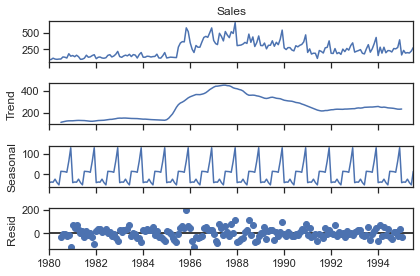

In [24]:
decomposition = seasonal_decompose(ssdf['Sales'],model='additive')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    114.46
1980-08-01    118.96
1980-09-01    122.67
1980-10-01    126.12
1980-11-01    127.67
1980-12-01    127.62
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -42.18
1980-02-01    -39.06
1980-03-01    -40.12
1980-04-01    -25.09
1980-05-01    -41.88
1980-06-01    -53.21
1980-07-01     13.74
1980-08-01     13.08
1980-09-01     11.87
1980-10-01      8.84
1980-11-01     64.15
1980-12-01    129.87
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    -32.20
1980-08-01     -4.04
1980-09-01    -10.53
1980-10-01    -23.96
1980-11-01    -13.82
1980-12-01   -117.49
Name: resid, dtype: float64 



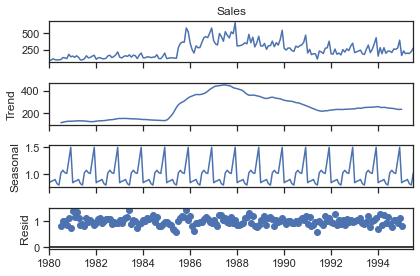

In [26]:
decomposition_mult = seasonal_decompose(ssdf['Sales'],model='multiplicative')
decomposition_mult.plot();

In [27]:
trend = decomposition_mult.trend
seasonality = decomposition_mult.seasonal
residual = decomposition_mult.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resid, dtype: fl

#### MonthPlot for the Time Series

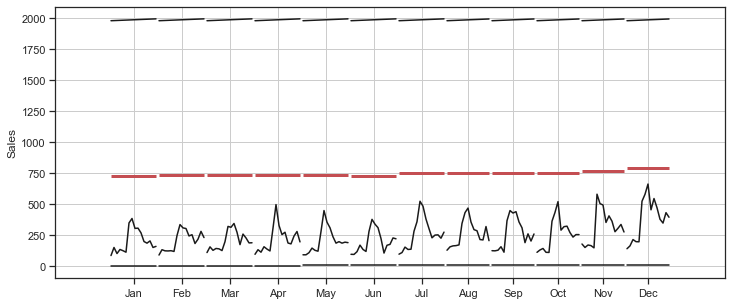

In [28]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(12,5))

month_plot(ssdf,ylabel='Sales',ax=ax)
plt.grid();

### 1.3 Split the data into training and test. The test data should start in 1991.

In [29]:
# Splitting the data into training and testing sets

train = ssdf[ssdf.index < '1991-01-01']
test = ssdf[ssdf.index >= '1991-01-01']


print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


In [30]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sales  Year  Month
YearMonth                     
1980-01-01     85  1980      1
1980-02-01     89  1980      2
1980-03-01    109  1980      3
1980-04-01     95  1980      4
1980-05-01     91  1980      5

Last few rows of Training Data


Sales  Year  Month
YearMonth                     
1990-08-01    285  1990      8
1990-09-01    309  1990      9
1990-10-01    322  1990     10
1990-11-01    362  1990     11
1990-12-01    471  1990     12

First few rows of Test Data


Sales  Year  Month
YearMonth                     
1991-01-01    198  1991      1
1991-02-01    253  1991      2
1991-03-01    173  1991      3
1991-04-01    186  1991      4
1991-05-01    185  1991      5

Last few rows of Test Data


Sales  Year  Month
YearMonth                     
1995-03-01    188  1995      3
1995-04-01    195  1995      4
1995-05-01    189  1995      5
1995-06-01    220  1995      6
1995-07-01    274  1995      7

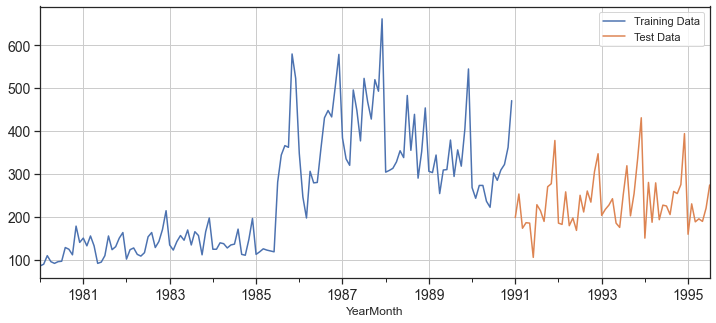

In [32]:
train['Sales'].plot(figsize=(12,5), fontsize=14)
test['Sales'].plot(figsize=(12,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 1.4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression 

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sales  Year  Month  time
YearMonth                           
1980-01-01     85  1980      1     1
1980-02-01     89  1980      2     2
1980-03-01    109  1980      3     3
1980-04-01     95  1980      4     4
1980-05-01     91  1980      5     5 

Last few rows of Training Data 
             Sales  Year  Month  time
YearMonth                           
1990-08-01    285  1990      8   128
1990-09-01    309  1990      9   129
1990-10-01    322  1990     10   130
1990-11-01    362  1990     11   131
1990-12-01    471  1990     12   132 

First few rows of Test Data 
             Sales  Year  Month  time
YearMonth                           
1991-01-01    198  1991      1    43
1991-02-01    253  1991      2    44
1991-03-01    173  1991      3    45
1991-04-01    186  1991      4    46
1991-05-01    185  1991      5    47 

Last few rows of Test Data 
             Sales  Year  Month  time
YearMonth                           
1995-03-01    188

In [35]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

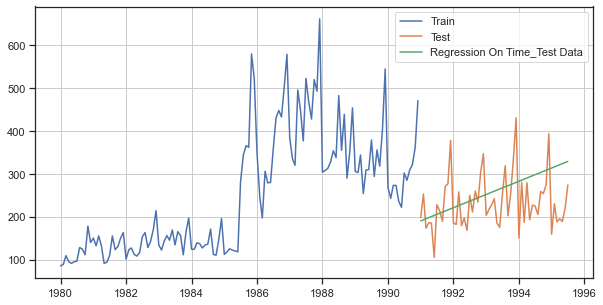

In [36]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(10,5))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [37]:
from sklearn import metrics

## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
print("For Regression on Time forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For Regression on Time forecast on the Test Data,  RMSE is 73.11


In [38]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  73.111522

#### Model 2: Naive Method

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

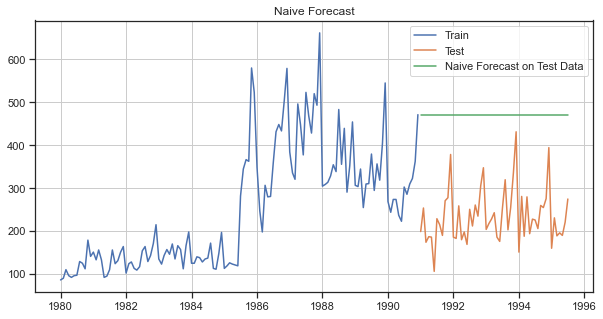

In [41]:
plt.figure(figsize=(10,5))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [42]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression   73.111522
Naive Model        245.121306

#### Model 3: Simple Average Method

In [43]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [44]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01    198  1991      1     250.575758
1991-02-01    253  1991      2     250.575758
1991-03-01    173  1991      3     250.575758
1991-04-01    186  1991      4     250.575758
1991-05-01    185  1991      5     250.575758

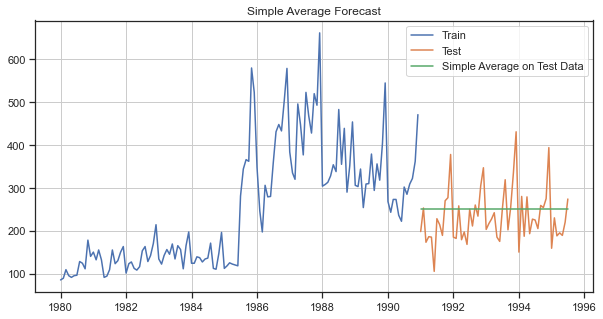

In [45]:
plt.figure(figsize=(10,5))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [46]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression      73.111522
Naive Model           245.121306
Simple Average Model   63.984570

#### Model 4 : Simple Exponential Smoothing

In [47]:
SES_train = train.copy()
SES_test = test.copy()

In [48]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



{'smoothing_level': 0.6051903717785323,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month     predict
YearMonth                                 
1991-01-01    198  1991      1  420.251631
1991-02-01    253  1991      2  420.251631
1991-03-01    173  1991      3  420.251631
1991-04-01    186  1991      4  420.251631
1991-05-01    185  1991      5  420.251631

In [50]:
resultsDf_4 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_4

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [53]:
rresultsDf_4 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_4

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model4_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model4_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_4 = resultsDf_4.append({'Alpha Values':i,'Train RMSE':rmse_model4_train_i 
                                      ,'Test RMSE':rmse_model4_test_i}, ignore_index=True)

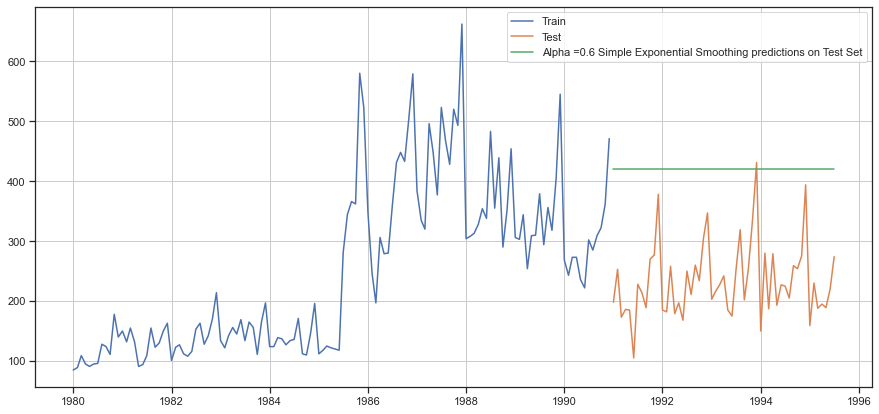

In [54]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,7))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [55]:
# MODEL EAVALUATION

resultsDf_4.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE   Test RMSE
0            0.1   85.052470  115.874445
9            0.1   85.052470  115.874445
1            0.2   77.208198  124.976820
10           0.2   77.208198  124.976820
2            0.3   74.555356  143.400350
11           0.3   74.555356  143.400350
3            0.4   73.062722  162.553211
12           0.4   73.062722  162.553211
4            0.5   72.200617  180.072484

In [57]:
resultsDf_4.sort_values(by=['Test RMSE'],ascending=True)

resultsDf_4 = pd.DataFrame({'Test RMSE': [resultsDf_4.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.6,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression                      73.111522
Naive Model                           245.121306
Simple Average Model                   63.984570
Alpha=0.6,SimpleExponentialSmoothing  115.874445

#### Model 5: Double Exponential Smoothing (Holt's Model)

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
DES_train = train.copy()
DES_test = test.copy()

In [59]:
model_DES = Holt(DES_train['Sales'])
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



{'smoothing_level': 0.6033810242585689,
 'smoothing_trend': 9.925434907792749e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.0,
 'initial_trend': 4.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month     predict
YearMonth                                 
1991-01-01    198  1991      1  426.564783
1991-02-01    253  1991      2  430.546010
1991-03-01    173  1991      3  434.527238
1991-04-01    186  1991      4  438.508465
1991-05-01    185  1991      5  442.489692

In [61]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6033, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6033, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 196.426


In [62]:
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [63]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model5_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model5_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_5 = resultsDf_5.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model5_train
                                          ,'Test RMSE':rmse_model5_test}, ignore_index=True)
resultsDf_5

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.1          0.1   86.865434    76.918569
1            0.1          0.2   84.467230   209.844048
2            0.1          0.3   84.311322   225.024262
3            0.1          0.4   86.219612   229.367329
4            0.1          0.5   89.354493   233.781137
..           ...          ...         ...          ...
95           1.0          0.6   97.917760  2694.069323
96           1.0          0.7  102.519502  2972.867602
97           1.0          0.8  107.552006  3235.495464
98           1.0          0.9  113.113025  3482.173468
99           1.0          1.0  119.350991  3712.530034

[100 rows x 4 columns]

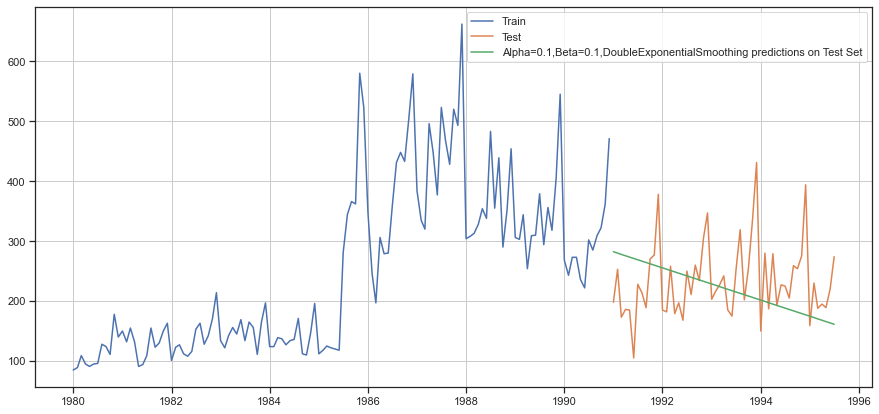

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,7))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [65]:
#Model Evaluation

resultsDf_5.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   86.865434   76.918569
10           0.2          0.1   79.176724  163.808796
1            0.1          0.2   84.467230  209.844048
2            0.1          0.3   84.311322  225.024262
3            0.1          0.4   86.219612  229.367329
4            0.1          0.5   89.354493  233.781137
20           0.3          0.1   77.444707  272.304803
5            0.1          0.6   92.995775  281.663653
11           0.2          0.2   81.547984  325.927930

In [66]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                                    73.111522
Naive Model                                         245.121306
Simple Average Model                                 63.984570
Alpha=0.6,SimpleExponentialSmoothing                115.874445
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   76.918569

#### Model 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [67]:
TES_train = train.copy()
TES_test = test.copy()

In [68]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [69]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [70]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.5707142857142857,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.29372180451127816,
 'damping_trend': nan,
 'initial_level': 116.47499999999994,
 'initial_trend': 1.6939393939394014,
 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
        -21.42013889, -11.18055556, -10.83680556,  18.14236111,
         -2.53472222, -12.53472222,  28.90277778,  40.87152778]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.5709514058454049,
 'smoothing_trend': 0.00016874091813961914,
 'smoothing_seasonal': 0.20311586918292823,
 'damping_trend': nan,
 'initial_level': 116.3966292062607,
 'initial_trend': 0.20928149613750927,
 'initial_seasons': array([1.0579855 , 1.02028016, 1.2308474 , 1.3949886 , 1.3219193 ,
        1.07452966, 1.18287636, 1.49611018, 1.72423307, 1.47055965,
        1.74925493, 1.91046126]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.5707107145438959,
 'smoothing_trend': 0.00010535626011622165,
 'smoothing_seasonal': 0.20334755075736372,
 'damping_trend': nan,
 'initial_level': 116.47522413279832,
 'initial_trend': 1.0172156191433426,
 'initial_seasons': array([0.92264424, 0.90398149, 1.01193625, 1.09542649, 0.98384022,
        0.9123328 , 0.92159406, 1.13771056, 1.37217409, 1.18455285,
        1.32238279, 1.38367395]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.5707142857142857,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.29372180451127816,
 'damping_trend': nan,
 'initial_level': 116.47499999999994,
 'initial_trend': 1.01454337320403,
 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
        -21.42013889, -11.18055556, -10.83680556,  18.14236111,
         -2.53472222, -12.53472222,  28.90277778,  40.87152778]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01    198  1991      1     219.083658
1991-02-01    253  1991      2     213.816321
1991-03-01    173  1991      3     246.658224
1991-04-01    186  1991      4     267.260236
1991-05-01    185  1991      5     287.719744

In [75]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01    198  1991      1     219.083658     261.443563
1991-02-01    253  1991      2     213.816321     243.476921
1991-03-01    173  1991      3     246.658224     257.671770
1991-04-01    186  1991      4     267.260236     270.931308
1991-05-01    185  1991      5     287.719744     268.179619

In [76]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01    198  1991      1     219.083658     261.443563     268.115156
1991-02-01    253  1991      2     213.816321     243.476921     257.719476
1991-03-01    173  1991      3     246.658224     257.671770     281.319636
1991-04-01    186  1991      4     267.260236     270.931308     302.724390
1991-05-01    185  1991      5     287.719744     268.179619     302.223290

In [77]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01    198  1991      1     219.083658     261.443563     268.115156   
1991-02-01    253  1991      2     213.816321     243.476921     257.719476   
1991-03-01    173  1991      3     246.658224     257.671770     281.319636   
1991-04-01    186  1991      4     267.260236     270.931308     302.724390   
1991-05-01    185  1991      5     287.719744     268.179619     302.223290   

            predict_tm_sa  
YearMonth                  
1991-01-01     222.832021  
1991-02-01     220.046797  
1991-03-01     255.908943  
1991-04-01     279.906417  
1991-05-01     304.265641

In [78]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.5707, Beta = 0.0001, Gamma = 0.2937 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.5707, Beta = 0.000105, Gamma = 0.2033 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.5707, Beta = 0.0001, Gamma = 0.2937 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.5707, Beta = 0.0001, Gamma = 0.2937 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 128.993
For Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 87.252
For Alpha =0.5707, Beta = 0.000105, Gamma = 0.2033 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 321.928
For Alpha =0.5707, Beta = 0.0001, Gamma = 0.2937 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 270.966


In [79]:
resultsDf_6 = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=[' Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                    73.111522
Naive Model                                         245.121306
Simple Average Model                                 63.984570
Alpha=0.6,SimpleExponentialSmoothing                115.874445
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   76.918569
 Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031...  196.425507

In [80]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6_1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [81]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_6_1

## First we will define an empty dataframe to store our values from the loop

resultsDf_6_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_6_1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [82]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [83]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [84]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [85]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [86]:
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01    198  1991      1                      236.400265   
1991-02-01    253  1991      2                      220.653934   
1991-03-01    173  1991      3                      230.735578   
1991-04-01    186  1991      4                      239.029589   
1991-05-01    185  1991      5                      226.944587   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                      223.811242   
1991-02-01                      203.489543   
1991-03-01                      214.393346   
1991-04-01                      225.453092   
1991-05-01                      217.914246   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                      220.697254   
1991-02-01                                      199.284888   
1991-03-01                                      213.154472   
1991-04-01                                      218.872527   
1991-05-01                                      213.931448   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                      221.765580                      223.699901   
1991-02-01                      200.938999                      203.781304   
1991-03-01                      218.912339                      226.140401   
1991-04-01                      216.415111                      216.149305   
1991-05-01                      212.084752                      210.309893   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                      224.678121   
1991-02-01                      205.156897   
1991-03-01                      231.522897   
1991-04-01                      216.873728   
1991-05-01                      207.290901   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                     223.931118  ...   
1991-02-01                                     203.996220  ...   
1991-03-01                                     233.564380  ...   
1991-04-01                                     218.066806  ...   
1991-05-01                                     202.502683  ...   

            (predict_tm_sa, 1.0, 1.0, 0.1)  (predict_tm_sa, 1.0, 1.0, 0.2)  \
YearMonth                                                                    
1991-01-01                      353.018096                      195.656825   
1991-02-01                      572.957139                      355.293654   
1991-03-01                      696.539290                      561.847739   
1991-04-01                      749.415380                      568.995404   
1991-05-01                      798.565427                      538.177550   

            (predict_tm_sa, 1.0, 1.0, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                       75.105935   
1991-02-01                                       57.333557   
1991-03-01                                      261.320818   
1991-04-01                                      331.252371   
1991-05-01                                      175.740931   

            (predict_tm_sa, 1.0, 1.0, 0.4)  (predict_tm_sa, 1.0, 1.0, 0.5)  \
YearMonth                                                                    
1991-01-01                      -46.447158                     -243.600429   
1991-02-01                     -244.976448                     -807.425219   
1991-03-01                     -253.146454                    -1026.410114   
1991-04-01                      -51.068105                    -1065.077149   
1991-05-

In [87]:
resultsDf_6_1.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
54             0.1          0.6           0.5   90.119200  45.832046  ta_sa
1054           0.1          0.6           0.5   90.119200  45.832046  ta_sm
3054           0.1          0.6           0.5   90.119200  45.832046  tm_sa
2054           0.1          0.6           0.5   90.119200  45.832046  tm_sm
2091           0.1          1.0           0.2   93.566491  47.269336  tm_sm

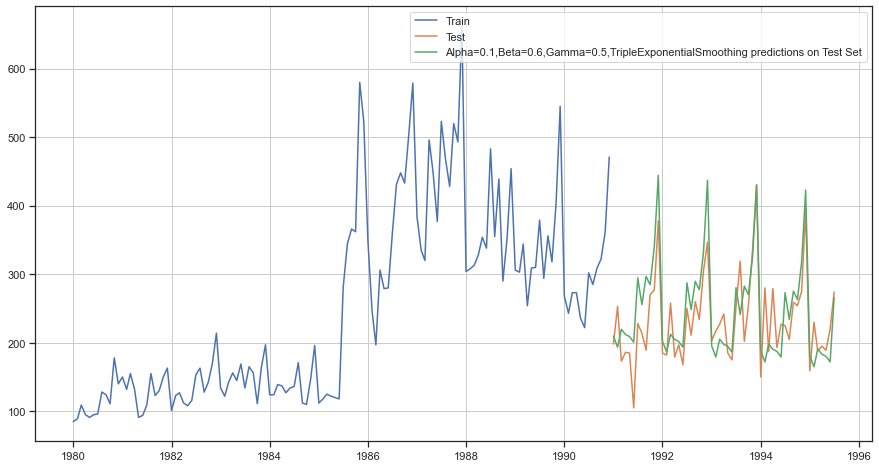

In [88]:
#  Best figures obtained for Trend = Additive and Seasonality = Additive
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(15,8))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_ta_sa', 0.1, 0.6, 0.5], 
         label='Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [89]:
resultsDf_6_1_rsme = pd.DataFrame({'Test RMSE': [resultsDf_6_1.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1_rsme])
resultsDf

Test RMSE
Linear Regression                                    73.111522
Naive Model                                         245.121306
Simple Average Model                                 63.984570
Alpha=0.6,SimpleExponentialSmoothing                115.874445
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   76.918569
 Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031...  196.425507
Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialS...   45.832046

### 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

#### Applying Augmented Dickey-Fuller test whether the series has unit and whether it is stationary or non-stationary.

Hypothesis for the ADF test:

H0 : The Time Series has a unit root and is thus non-stationary (Null Hypothesis)

H1 : The Time Series does not have a unit root and is thus stationary. (Alternate Hypothesis)

We see that for α = 5%, the Time Series is non-stationary.

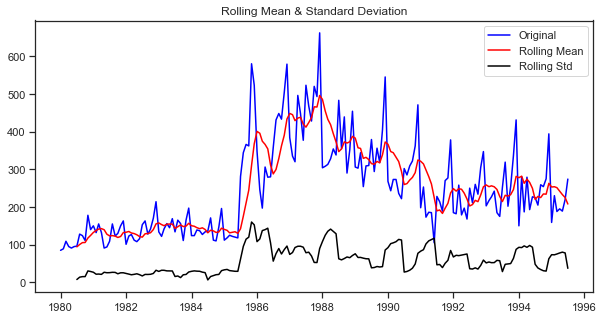

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [90]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(ssdf['Sales'])

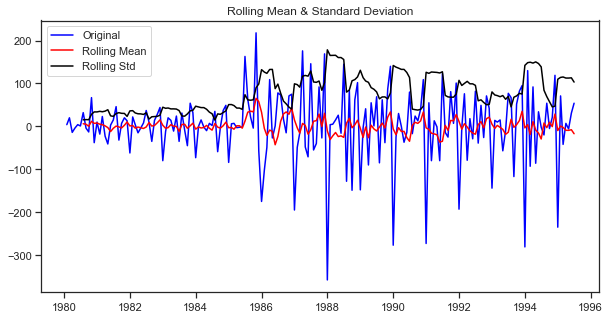

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [91]:
test_stationarity(ssdf['Sales'].diff().dropna())

### 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE

#### Auto - Arima Model

In [92]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [93]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [95]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095962
ARIMA(0, 1, 1) - AIC:1497.050322418796
ARIMA(0, 1, 2) - AIC:1494.9646053663423
ARIMA(0, 1, 3) - AIC:1495.1484738738855
ARIMA(1, 1, 0) - AIC:1501.6431242011804
ARIMA(1, 1, 1) - AIC:1492.4871865078985
ARIMA(1, 1, 2) - AIC:1494.4238594577096
ARIMA(1, 1, 3) - AIC:1496.3858782560492
ARIMA(2, 1, 0) - AIC:1498.9504830259475
ARIMA(2, 1, 1) - AIC:1494.4314983035783
ARIMA(2, 1, 2) - AIC:1496.4107391764037


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3) - AIC:1480.8048071150276
ARIMA(3, 1, 0) - AIC:1498.930309422809
ARIMA(3, 1, 1) - AIC:1496.3468641048478
ARIMA(3, 1, 2) - AIC:1495.6558545472712
ARIMA(3, 1, 3) - AIC:1479.6868325586358


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [96]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
15  (3, 1, 3)  1479.686833
11  (2, 1, 3)  1480.804807
5   (1, 1, 1)  1492.487187
6   (1, 1, 2)  1494.423859
9   (2, 1, 1)  1494.431498
2   (0, 1, 2)  1494.964605
3   (0, 1, 3)  1495.148474
14  (3, 1, 2)  1495.655855
13  (3, 1, 1)  1496.346864
7   (1, 1, 3)  1496.385878
10  (2, 1, 2)  1496.410739
1   (0, 1, 1)  1497.050322
12  (3, 1, 0)  1498.930309
8   (2, 1, 0)  1498.950483
4   (1, 1, 0)  1501.643124
0   (0, 1, 0)  1508.283772

In [97]:
auto_ARIMA = ARIMA(train['Sales'], order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -732.843
Date:                Sun, 25 Feb 2024   AIC                           1479.687
Time:                        14:52:12   BIC                           1499.813
Sample:                    01-01-1980   HQIC                          1487.865
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5588      0.117      4.767      0.000       0.329       0.789
ar.L2         -1.0067      0.022    -44.874      0.000      -1.051      -0.963
ar.L3          0.5423      0.119      4.540      0.0

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Predict on the Test Set using this model and evaluate the model.

In [98]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

135.90675349144124


In [99]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                    73.111522
Naive Model                                         245.121306
Simple Average Model                                 63.984570
Alpha=0.6,SimpleExponentialSmoothing                115.874445
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   76.918569
 Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031...  196.425507
Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialS...   45.832046
Auto_ARIMA                                          135.906753

#### SARIMA Model

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [101]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [102]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373172
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347133


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4999.426551659575
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686522
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.0843995008563


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4191.161087935331
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421277
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.03963050108


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3624.801841260017
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1071.7371393677754
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1073.5912665500778
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1074.3858105920142


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3701.7228793075196
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738224
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387721
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.4842426144


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4373.760005107966
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003477
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.767566926066
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585346258
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3777.024589984474
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767697
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.20913719193
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.8757060506216


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3494.3982265934387
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1063.8535916161482
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1064.988494032024
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1065.4784220756217


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3539.130190193899
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1463.5451272120986
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1308.3453006660334
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1177.0247487773704


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4234.485707863977
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1315.5733347402766
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1279.6069439950604
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1156.1654292736434


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3515.098216568668
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1190.066349043617
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1190.0436339224054
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1157.7723133299278


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3559.2989728627026
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1065.79963565926
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1066.868250077612
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1067.2348348823482


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3280.0594808742944
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1453.3926745336964
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1295.69265028255
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1165.1974640133044


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:4447.3840491644405
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1312.3375717570543
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1267.121111118219
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1143.6879109006702


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3277.566790280318
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1188.2299003814217
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1187.6169780678888
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1145.4715645071199


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3255.781182072765
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1064.8145559441714
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1066.0536870470614
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1066.4459262177702


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3261.14466784637
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1491.1378318825623
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1331.4058144092064
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1197.560194010963


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5149.143834871223
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1303.2203127538983
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1296.8057138710692
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1173.386771814444


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3631.514191836917
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1177.1656900229468
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1175.6619338127352
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1175.0815891386035


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3833.554542720181
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1053.126595075334
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1053.9200291589339
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1053.1805293382008


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3674.307328330061
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1471.86698717727
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1315.3261912470462
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1186.0030842411945


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4375.907275860184
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1305.195510169828
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1288.6795015088007
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1165.1792553700416


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3305.9386834494853
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1179.1583649856852
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1177.6069139987
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1166.9242913618618


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3483.7551517001475
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1055.1252199394735
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1055.8125293141165
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1055.0703093525924


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3379.6727190420543
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1463.444554964901
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1306.7163356174697
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1176.294624765694


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4450.662784613616
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1306.19469446475
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1280.3994898125366
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1157.0825892930775


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3599.498881354366
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1180.682365210996
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1179.602799287713
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1158.7941776752587


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3489.734408523749
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1056.926238609718
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1057.7183714505059
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1057.0130367763109


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3422.841677641431
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1455.1227996397454
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1297.9909784306417
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1167.2864076953838
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:4597.706061781605
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1304.015993271125
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1268.9081401642559
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1145.236466445801


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3323.0433182731435
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1179.8716548587884
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1178.3362492007118
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1147.0079741318184


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3361.8031648584215
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1056.181487438126
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1056.4520970801996
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1055.8086453972903


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3312.0675207120253
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1477.9194683056446
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1331.9353193748686
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1199.1019589233917
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5002.793920755574
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1295.2181640818894
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1288.6840148345668
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1175.3764824239634


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4278.436672801353
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1169.1269676598504
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1167.363977501495
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1166.9191464407147


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:4305.288725867662
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1045.0214623097847
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1044.8866865003163
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1044.2189447354554
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3748.538717840011
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1473.8515321187892
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1316.7129215405857
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1185.5196690090593


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:4307.86237524852
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1293.3419959529417
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1289.296741061867
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1166.103014836742
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3795.815995528598
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.666342596685
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.520870718639
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.6766925889065


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3639.1225777190057
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1045.5602424877375
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1046.7173396255441
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1046.204513914807
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3617.7852825259406
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.1902793545228
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.2038016335189
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.4764240714348


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:4518.139291728519
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262882188
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.66611042903
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.490990122567


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2962.103689441311
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1169.9627314264064
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1170.046366446622
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1158.6303270451


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2846.291614031265
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1046.722420583199
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1048.003507726075
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1047.5868190799679


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3105.6639122228776
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1438.7608774828127
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1299.434269938157
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1169.3674504628368


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4743.85487727782
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1295.024284776992
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1270.7701812743312
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1147.2099488686913


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3678.8897262627
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1171.3899150090606
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1170.3347147541338
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1148.9865266972054


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3716.627423368014
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1047.9074110051483
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1048.4590762656594
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1047.685473351667


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3667.759737023889
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1467.4747263045615
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1330.560360708876
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1197.9633133926377


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5080.204126154393
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1284.1847455580132
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1280.0127999459935
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1176.773970310516
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3836.459178148309
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1159.801733879623
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1159.0479224103033
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1158.4294432645029


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3633.29590712363
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1036.0673224573497
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1036.5454169463364
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1035.7107027235656


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3433.740090851026
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1465.3971811572192
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1318.5182357820775
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1189.574995422631


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:4945.858838590229
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1283.586418962026
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1279.4496962614382
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1166.4107308985813
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3797.815995412365
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1159.4465234941526
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1158.4875590793552
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1157.8123209777914


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3641.122577717455
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1035.907112769416
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1036.998755876954
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1035.9098739749525


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3524.7774835672744
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1465.6255973322495
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1308.860628263755
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1177.4468779239564
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4326.236110515503
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1284.5907586677833
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1281.445480700637
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1157.524906883333


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:5320.273861398171
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1161.4267100435868
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1159.896844332011
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1159.3184752048223


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:5496.966841809234
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1037.7828894488687
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1038.7860586815248
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1037.6247431421511


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:5533.383025710938
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1438.0171445937044
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1297.0159340627777
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1168.6914084964685


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:4459.66912227343
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1286.6826494703214
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1272.740908749059
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1149.1427523127259


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2443.009021574344
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1163.2881322629262
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1161.7217438153725
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1150.9189143515862
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3754.695572633996
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1039.599414164316
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1040.2844165872903
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1039.2195321055492


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3700.553764740565


In [103]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
206  (3, 1, 0)  (3, 0, 2, 12)  1035.710703
220  (3, 1, 1)  (3, 0, 0, 12)  1035.907113
222  (3, 1, 1)  (3, 0, 2, 12)  1035.909874
204  (3, 1, 0)  (3, 0, 0, 12)  1036.067322
205  (3, 1, 0)  (3, 0, 1, 12)  1036.545417

In [104]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 0),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -508.855
Date:                                 Sun, 25 Feb 2024   AIC                           1035.711
Time:                                         15:00:55   BIC                           1058.407
Sample:                                              0   HQIC                          1044.871
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3834      0.093     -4.125      0.000      -0.566      -0

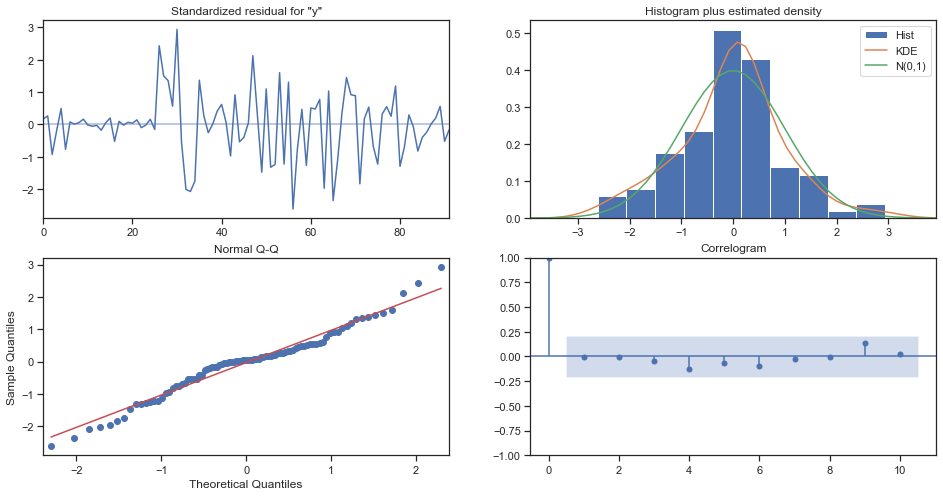

In [105]:
results_auto_SARIMA_6.plot_diagnostics(figsize=(16, 8))
plt.show();

#### Predict on the Test Set using this model and evaluate the model.¶

In [106]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  224.026414  57.754319     110.830029     337.222799
1  199.659571  67.849899      66.676213     332.642928
2  210.623091  80.475621      52.893773     368.352410
3  238.094124  88.618545      64.404967     411.783281
4  219.827469  97.503316      28.724482     410.930456

In [107]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

73.01251709535056


In [108]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,0),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                    73.111522
Naive Model                                         245.121306
Simple Average Model                                 63.984570
Alpha=0.6,SimpleExponentialSmoothing                115.874445
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   76.918569
 Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031...  196.425507
Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialS...   45.832046
Auto_ARIMA                                          135.906753
(3,1,0),(3,0,2,12),Auto_SARIMA                       73.012517

### 1.7 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data

In [109]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialS...   45.832046
Simple Average Model                                 63.984570
(3,1,0),(3,0,2,12),Auto_SARIMA                       73.012517
Linear Regression                                    73.111522
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   76.918569
Alpha=0.6,SimpleExponentialSmoothing                115.874445
Auto_ARIMA                                          135.906753
 Alpha =0.5709, Beta = 0.000168, Gamma = 0.2031...  196.425507
Naive Model                                         245.121306

### 1.8 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [110]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [111]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [112]:
TES_train = ssdf.copy()

In [113]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
alpha=0.1
beta=0.6
gamma=0.5
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [114]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01         215.993616
1995-09-01         230.676643
1995-10-01         249.729067
1995-11-01         301.894467
1995-12-01         414.504032
1996-01-01         189.401997
1996-02-01         270.887545
1996-03-01         237.137077
1996-04-01         269.920268
1996-05-01         246.657350
1996-06-01         270.599996
1996-07-01         282.050536

In [115]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI  prediction    upper_ci
1995-08-01   55.612389  215.993616  376.374842
1995-09-01   70.295417  230.676643  391.057870
1995-10-01   89.347840  249.729067  410.110293
1995-11-01  141.513240  301.894467  462.275693
1995-12-01  254.122805  414.504032  574.885258

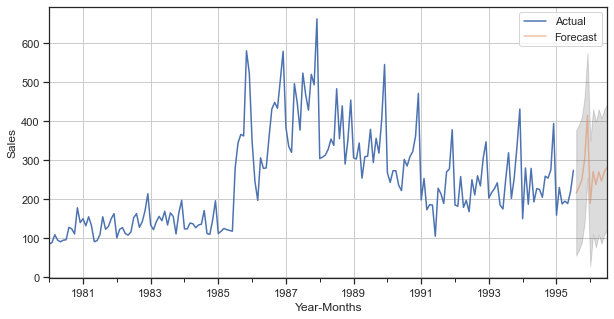

In [116]:
# plot the forecast along with the confidence band

axis = ssdf['Sales'].plot(label='Actual', figsize=(10,5))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

_______________________________________________________________________________________________________________________________

# <u> Problem 2 for the Data Set : SoftDrink.csv <u>

# You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drinks has been given to you from January 1980 to July 1995.

## 2.1. Read the data as an appropriate Time Series data and plot the data.

In [357]:
sdf = pd.read_csv("SoftDrink.csv",parse_dates=True,squeeze=True,index_col=0)
sdf = pd.DataFrame(sdf)

In [358]:
sdf.head(2)

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302

In [359]:
sdf.tail(2)

SoftDrinkProduction
YearMonth                      
1995-06-01                 4365
1995-07-01                 4290

In [360]:
sdf.shape

(187, 1)

In [249]:
sdf['Year']=sdf.index.year
sdf['Month']=sdf.index.month
sdf.head()

SoftDrinkProduction  Year  Month
YearMonth                                   
1980-01-01                 1954  1980      1
1980-02-01                 2302  1980      2
1980-03-01                 3054  1980      3
1980-04-01                 2414  1980      4
1980-05-01                 2226  1980      5

In [251]:
sdf.columns=['Production', 'Year', 'Month']

print ('**Head of the given Dataset**')
print(sdf.head())

print ('**Tail of the given Dataset**')
print(sdf.tail())

**Head of the given Dataset**
            Production  Year  Month
YearMonth                          
1980-01-01        1954  1980      1
1980-02-01        2302  1980      2
1980-03-01        3054  1980      3
1980-04-01        2414  1980      4
1980-05-01        2226  1980      5
**Tail of the given Dataset**
            Production  Year  Month
YearMonth                          
1995-03-01        4067  1995      3
1995-04-01        4022  1995      4
1995-05-01        3937  1995      5
1995-06-01        4365  1995      6
1995-07-01        4290  1995      7


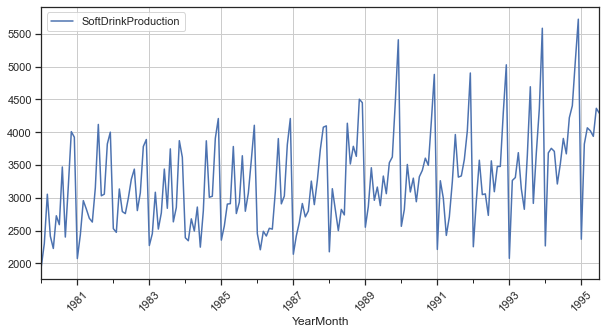

In [248]:
sdf.plot(figsize=(10,5))
plt.xticks(rotation=45)
plt.grid();

## 2.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [252]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  187 non-null    int64
 1   Year        187 non-null    int64
 2   Month       187 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


In [253]:
sdf.isnull().sum()

Production    0
Year          0
Month         0
dtype: int64

In [254]:
sdf.describe().T

count         mean         std     min     25%     50%     75%  \
Production  187.0  3262.609626  728.357367  1954.0  2748.0  3134.0  3741.0   
Year        187.0  1987.299465    4.514749  1980.0  1983.0  1987.0  1991.0   
Month       187.0     6.406417    3.450972     1.0     3.0     6.0     9.0   

               max  
Production  5725.0  
Year        1995.0  
Month         12.0

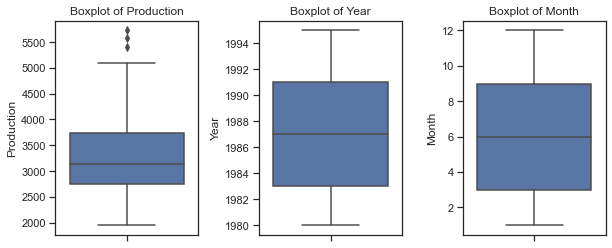

In [255]:
sdf_boxplot=sdf
plt.figure(figsize = (20,10))
feature_list = sdf_boxplot.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = sdf_boxplot[feature_list[i]], data = sdf_boxplot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

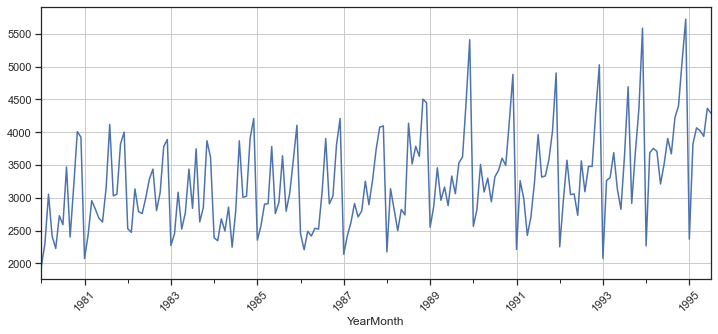

In [256]:
plt.figure(figsize=(12,5))

sdf['Production'].plot()
plt.xticks(rotation=45)
plt.grid();

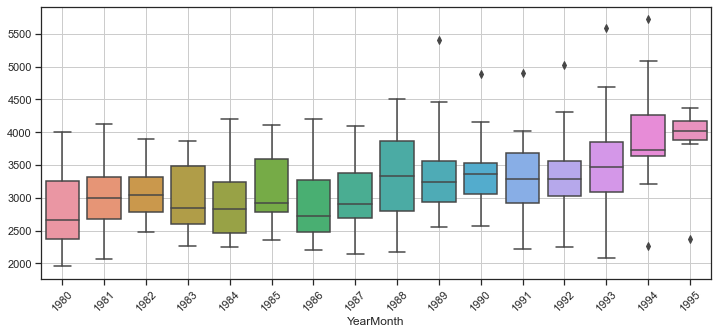

In [257]:
#Boxplot for year

_, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = sdf.index.year,y = sdf.values[:,0],ax=ax)
plt.xticks(rotation=45);
plt.grid();

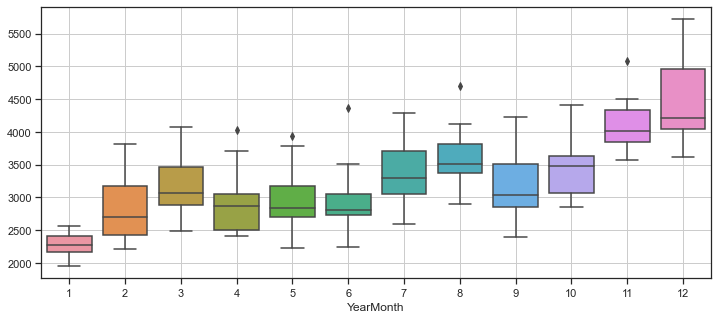

In [258]:
#Monthy Boxplot

_, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = sdf.index.month,y = sdf.values[:,0],ax=ax)
plt.grid();

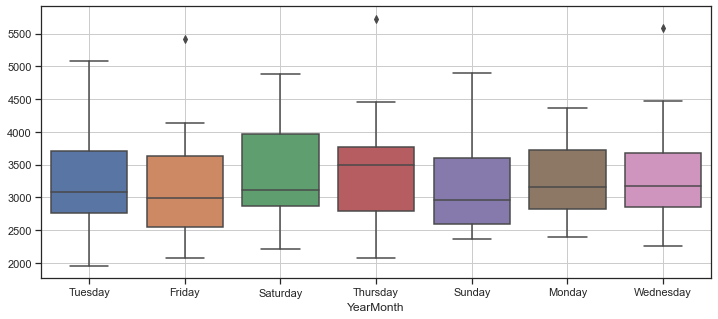

In [259]:
# Weekly Boxplot

_, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = sdf.index.day_name(),y = sdf.values[:,0],ax=ax)
plt.grid();

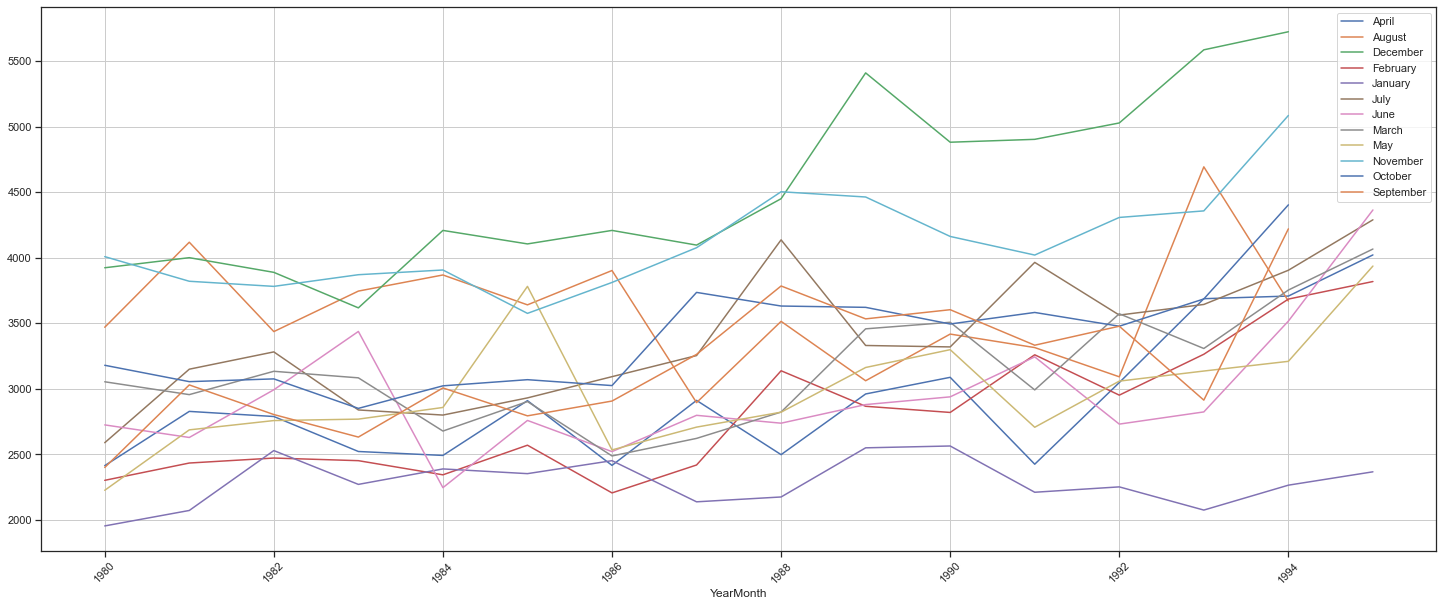

In [260]:
monthly_sales_across_years = pd.pivot_table(sdf, values = 'Production', columns = sdf.index.month_name(), index = sdf.index.year)
monthly_sales_across_years.plot(figsize=(25,10))
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best');

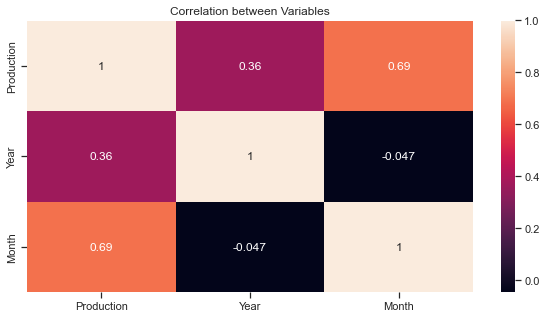

In [261]:
plt.figure(figsize=(10,5))
sns.heatmap(sdf.corr(),annot=True)
plt.title('Correlation between Variables');
plt.show()

In [262]:
sdf_decade_sum = sdf.resample('10Y').sum()
sdf_decade_sum

Production    Year  Month
YearMonth                            
1980-12-31       34247   23760     78
1990-12-31      378143  238260    780
2000-12-31      197718  109605    340

### ECDF Plot :::. Empirical Cumulative Distribution Function

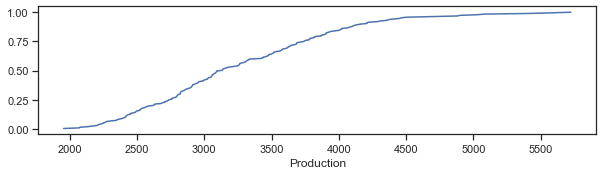

In [263]:
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks") 
plt.figure(figsize = (10,8))

plt.subplot(312)
ecdf = ECDF(sdf['Production'])
plt.plot(ecdf.x, ecdf.y, label = "statmodels")
plt.xlabel('Production');

### Decomposing the Time Series

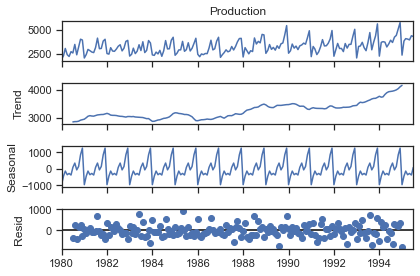

In [264]:
decomposition = seasonal_decompose(sdf['Production'],model='additive')
decomposition.plot();

In [265]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2858.83
1980-08-01    2869.25
1980-09-01    2870.67
1980-10-01    2883.83
1980-11-01    2920.29
1980-12-01    2935.50
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -974.62
1980-02-01    -451.25
1980-03-01    -143.12
1980-04-01    -366.18
1980-05-01    -286.82
1980-06-01    -383.59
1980-07-01      82.19
1980-08-01     346.36
1980-09-01     -70.00
1980-10-01     136.72
1980-11-01     850.37
1980-12-01    1259.93
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01   -352.02
1980-08-01    254.39
1980-09-01   -400.67
1980-10-01    159.44
1980-11-01    238.34
1980-12-01   -271.43
Name: resid, dtype: float64 



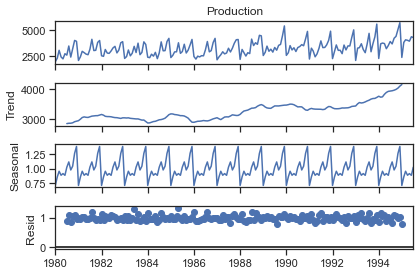

In [266]:
decomposition_mult = seasonal_decompose(sdf['Production'],model='multiplicative')
decomposition_mult.plot();

In [267]:
trend = decomposition_mult.trend
seasonality = decomposition_mult.seasonal
residual = decomposition_mult.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

### MonthPlot for the Time Series

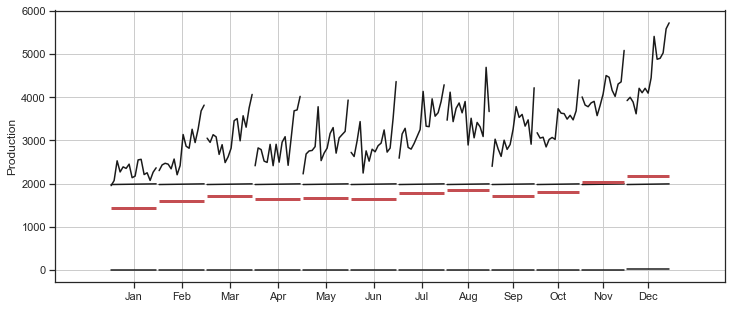

In [268]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(12,5))

month_plot(sdf,ylabel='Production',ax=ax)
plt.grid();

### 2.3 Split the data into training and test. The test data should start in 1991.

In [269]:
# Splitting the data into training and testing sets

train = sdf[sdf.index < '1991-01-01']
test = sdf[sdf.index >= '1991-01-01']

print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


In [270]:
from IPython.display import display

In [271]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Production  Year  Month
YearMonth                          
1980-01-01        1954  1980      1
1980-02-01        2302  1980      2
1980-03-01        3054  1980      3
1980-04-01        2414  1980      4
1980-05-01        2226  1980      5

Last few rows of Training Data


Production  Year  Month
YearMonth                          
1990-08-01        3418  1990      8
1990-09-01        3604  1990      9
1990-10-01        3495  1990     10
1990-11-01        4163  1990     11
1990-12-01        4882  1990     12

First few rows of Test Data


Production  Year  Month
YearMonth                          
1991-01-01        2211  1991      1
1991-02-01        3260  1991      2
1991-03-01        2992  1991      3
1991-04-01        2425  1991      4
1991-05-01        2707  1991      5

Last few rows of Test Data


Production  Year  Month
YearMonth                          
1995-03-01        4067  1995      3
1995-04-01        4022  1995      4
1995-05-01        3937  1995      5
1995-06-01        4365  1995      6
1995-07-01        4290  1995      7

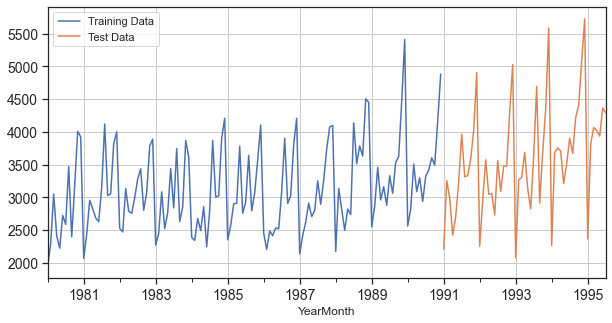

In [272]:
train['Production'].plot(figsize=(10,5), fontsize=14)
test['Production'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 2.4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

In [273]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [274]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Production  Year  Month  time
YearMonth                                
1980-01-01        1954  1980      1     1
1980-02-01        2302  1980      2     2
1980-03-01        3054  1980      3     3
1980-04-01        2414  1980      4     4
1980-05-01        2226  1980      5     5 

Last few rows of Training Data 
             Production  Year  Month  time
YearMonth                                
1990-08-01        3418  1990      8   128
1990-09-01        3604  1990      9   129
1990-10-01        3495  1990     10   130
1990-11-01        4163  1990     11   131
1990-12-01        4882  1990     12   132 

First few rows of Test Data 
             Production  Year  Month  time
YearMonth                                
1991-01-01        2211  1991      1    43
1991-02-01        3260  1991      2    44
1991-03-01        2992  1991      3    45
1991-04-01        2425  1991      4    46
1991-05-01        2707  1991      5    47 

Last few rows o

In [275]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Production'].values)

LinearRegression()

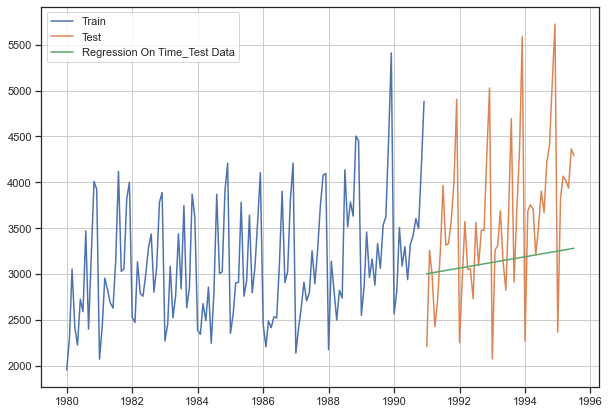

In [276]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(10,7))
plt.plot( train['Production'], label='Train')
plt.plot(test['Production'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [277]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Production'],test_predictions_model1,squared=False)
print("For Regression on Time forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For Regression on Time forecast on the Test Data,  RMSE is 898.17


In [278]:
rmse_model1_test = metrics.mean_squared_error(test['Production'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  898.172528

#### Model 2: Naive Method

In [279]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [282]:
NaiveModel_test['naive'] = np.asarray(train['Production'])[len(np.asarray(train['Production']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

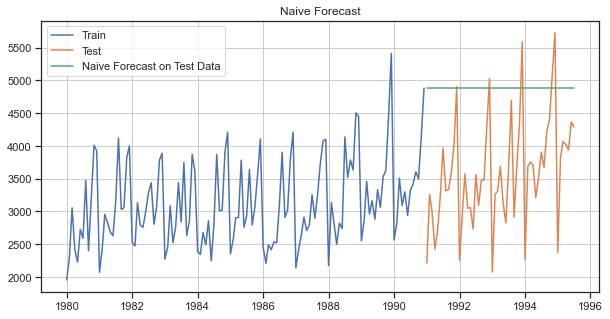

In [285]:
plt.figure(figsize=(10,5))
plt.plot(NaiveModel_train['Production'], label='Train')
plt.plot(test['Production'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [286]:
rmse_model2_test = metrics.mean_squared_error(test['Production'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression   898.172528
Naive Model        1519.259233

#### Model 3: Simple Average Method

In [287]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [288]:
SimpleAverage_test['mean_forecast'] = train['Production'].mean()
SimpleAverage_test.head()

Production  Year  Month  mean_forecast
YearMonth                                         
1991-01-01        2211  1991      1    3124.166667
1991-02-01        3260  1991      2    3124.166667
1991-03-01        2992  1991      3    3124.166667
1991-04-01        2425  1991      4    3124.166667
1991-05-01        2707  1991      5    3124.166667

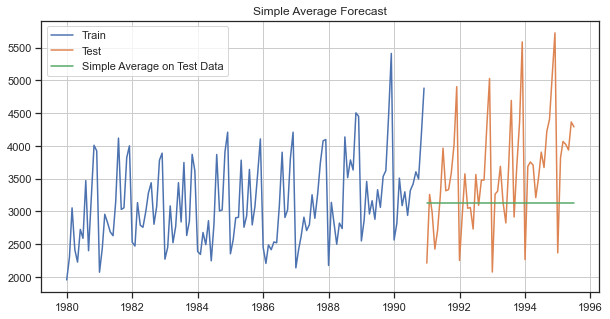

In [289]:
plt.figure(figsize=(10,5))
plt.plot(SimpleAverage_train['Production'], label='Train')
plt.plot(SimpleAverage_test['Production'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [290]:
rmse_model3_test = metrics.mean_squared_error(test['Production'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression      898.172528
Naive Model           1519.259233
Simple Average Model   934.353358

#### Model 4: Simple Exponential Smoothing

In [291]:
SES_train = train.copy()
SES_test = test.copy()

In [292]:
model_SES = SimpleExpSmoothing(SES_train['Production'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



{'smoothing_level': 0.1572701178186637,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1954.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [293]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Production  Year  Month      predict
YearMonth                                       
1991-01-01        2211  1991      1  3736.175068
1991-02-01        3260  1991      2  3736.175068
1991-03-01        2992  1991      3  3736.175068
1991-04-01        2425  1991      4  3736.175068
1991-05-01        2707  1991      5  3736.175068

In [294]:
resultsDf_4 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_4

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [295]:
rresultsDf_4 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_4

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model4_train_i = metrics.mean_squared_error(SES_train['Production'],SES_train['predict',i],squared=False)
    
    rmse_model4_test_i = metrics.mean_squared_error(SES_test['Production'],SES_test['predict',i],squared=False)
    
    resultsDf_4 = resultsDf_4.append({'Alpha Values':i,'Train RMSE':rmse_model4_train_i 
                                      ,'Test RMSE':rmse_model4_test_i}, ignore_index=True)

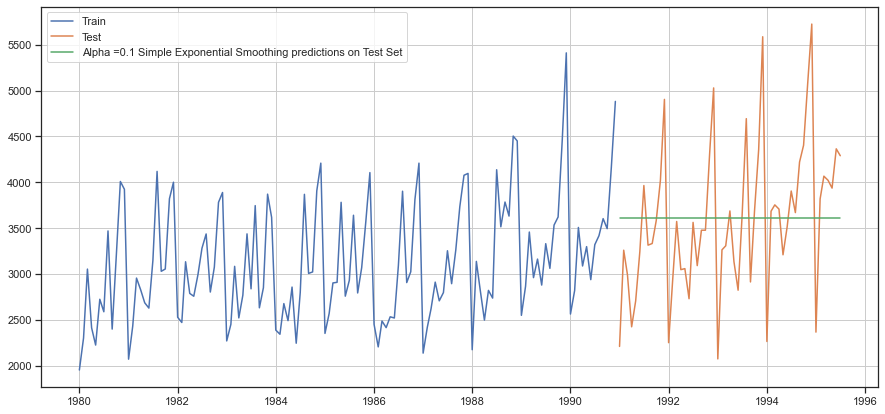

In [296]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,7))
plt.plot(SES_train['Production'], label='Train')
plt.plot(SES_test['Production'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [297]:
resultsDf_4.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE    Test RMSE
0           0.1  648.758846   807.346865
1           0.2  645.186884   838.357158
2           0.3  650.458591   910.187416
3           0.4  656.803409  1005.179377
4           0.5  664.777265  1105.985227
5           0.6  674.988238  1203.565956
6           0.7  687.376817  1294.680933
7           0.8  701.579829  1378.198740
8           0.9  717.287681  1453.359494

In [298]:
resultsDf_4.sort_values(by=['Test RMSE'],ascending=True)

resultsDf_4 = pd.DataFrame({'Test RMSE': [resultsDf_4.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression                      898.172528
Naive Model                           1519.259233
Simple Average Model                   934.353358
Alpha=0.1,SimpleExponentialSmoothing   807.346865

### Model 5: Double Exponential Smoothing (Holt's Model)

In [299]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
DES_train = train.copy()
DES_test = test.copy()

In [300]:
model_DES = Holt(DES_train['Production'])
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



{'smoothing_level': 0.42386847901827834,
 'smoothing_trend': 0.0838054705392187,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1954.0,
 'initial_trend': 348.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [301]:
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [302]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Production  Year  Month      predict
YearMonth                                       
1991-01-01        2211  1991      1  4320.487095
1991-02-01        3260  1991      2  4390.406358
1991-03-01        2992  1991      3  4460.325620
1991-04-01        2425  1991      4  4530.244882
1991-05-01        2707  1991      5  4600.164144

In [303]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Production'],SES_test['predict'],squared=False)
print("For Alpha =0.4238, Beta = 0.0838 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.4238, Beta = 0.0838 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 819.401


In [304]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model5_train = metrics.mean_squared_error(DES_train['Production'],DES_train['predict',i,j],squared=False)
        
        rmse_model5_test = metrics.mean_squared_error(DES_test['Production'],DES_test['predict',i,j],squared=False)
        
        resultsDf_5 = resultsDf_5.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model5_train
                                          ,'Test RMSE':rmse_model5_test}, ignore_index=True)
resultsDf_5

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1   893.178173    982.938364
1            0.1          0.2   765.760815   1082.798709
2            0.1          0.3   731.718292   1706.868339
3            0.1          0.4   723.859246   2440.654130
4            0.1          0.5   724.743011   3005.036806
..           ...          ...          ...           ...
95           1.0          0.6   966.636686  20022.235284
96           1.0          0.7  1011.096621  21622.565951
97           1.0          0.8  1057.472273  22867.057965
98           1.0          0.9  1106.076606  23716.650022
99           1.0          1.0  1157.631749  24121.117155

[100 rows x 4 columns]

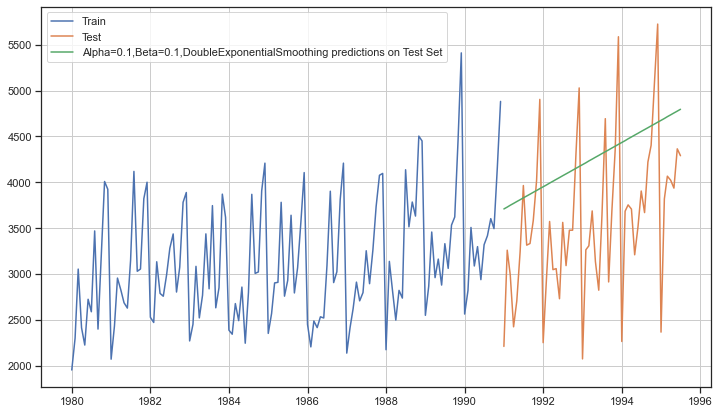

In [305]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,7))
plt.plot(DES_train['Production'], label='Train')
plt.plot(DES_test['Production'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [306]:
#Model Evaluation
resultsDf_5.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.1          0.1  893.178173   982.938364
1            0.1          0.2  765.760815  1082.798709
10           0.2          0.1  721.404860  1524.533365
2            0.1          0.3  731.718292  1706.868339
20           0.3          0.1  698.165128  2306.003981
3            0.1          0.4  723.859246  2440.654130
11           0.2          0.2  704.975902  2649.594505
4            0.1          0.5  724.743011  3005.036806
30           0.4          0.1  695.050853  3050.149683

In [307]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf_5 = pd.concat([resultsDf, resultsDf_5])
resultsDf_5

Test RMSE
Linear Regression                                    898.172528
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
Alpha=0.1,SimpleExponentialSmoothing                 807.346865
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...   982.938364

### Model 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [308]:
TES_train = train.copy()
TES_test = test.copy()

In [309]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Production'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Production'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Production'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Production'],trend='multiplicative',seasonal='additive')

model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge

In [310]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [311]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.1472534989486432,
 'smoothing_trend': 0.04026354431850927,
 'smoothing_seasonal': 0.2629540868781509,
 'damping_trend': nan,
 'initial_level': 2803.2140237611416,
 'initial_trend': 7.723235775089986,
 'initial_seasons': array([-687.2858862 , -582.87428475,  -55.66858985, -365.74485684,
        -253.2566672 , -196.41413047,  -32.54631739,  690.32226954,
        -282.20923916,   44.75082328,  867.4058155 ,  853.52009474]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [312]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11131733278228681,
 'smoothing_trend': 0.04949147175138958,
 'smoothing_seasonal': 0.2303355515954422,
 'damping_trend': nan,
 'initial_level': 2803.0952323882025,
 'initial_trend': 13.228732016590632,
 'initial_seasons': array([0.78054077, 0.84609569, 1.02994493, 0.91932324, 0.94257892,
        0.96524187, 1.02938452, 1.24055359, 1.015684  , 1.06493202,
        1.32750288, 1.37153411]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [313]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107142857142857,
 'smoothing_trend': 0.061706349206349195,
 'smoothing_seasonal': 0.23046296296296298,
 'damping_trend': nan,
 'initial_level': 2803.21111111111,
 'initial_trend': 1.009110583497497,
 'initial_seasons': array([0.77127674, 0.80652413, 0.98072146, 0.87853614, 0.91701715,
        0.93431479, 0.98755493, 1.22942066, 0.90435341, 1.01600495,
        1.29019936, 1.28407627]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [314]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.039935064935064934,
 'smoothing_seasonal': 0.26263736263736265,
 'damping_trend': nan,
 'initial_level': 2803.21111111111,
 'initial_trend': 1.009110583497497,
 'initial_seasons': array([-686.83246528, -582.93663194,  -55.91579861, -365.85329861,
        -252.90538194, -196.31163194,  -32.49913194,  690.53211806,
        -282.48871528,   44.61545139,  867.46961806,  853.12586806]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [315]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Production  Year  Month  predict_ta_sa
YearMonth                                         
1991-01-01        2211  1991      1    2572.065943
1991-02-01        3260  1991      2    2890.817364
1991-03-01        2992  1991      3    3286.539795
1991-04-01        2425  1991      4    2997.801806
1991-05-01        2707  1991      5    3204.774090

In [316]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Production  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                        
1991-01-01        2211  1991      1    2572.065943    2565.316395
1991-02-01        3260  1991      2    2890.817364    2888.563281
1991-03-01        2992  1991      3    3286.539795    3296.599201
1991-04-01        2425  1991      4    2997.801806    3007.531412
1991-05-01        2707  1991      5    3204.774090    3213.964525

In [317]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Production  Year  Month  predict_ta_sa  predict_ta_sm  \
YearMonth                                                           
1991-01-01        2211  1991      1    2572.065943    2565.316395   
1991-02-01        3260  1991      2    2890.817364    2888.563281   
1991-03-01        2992  1991      3    3286.539795    3296.599201   
1991-04-01        2425  1991      4    2997.801806    3007.531412   
1991-05-01        2707  1991      5    3204.774090    3213.964525   

            predict_tm_sm  
YearMonth                  
1991-01-01    2574.447295  
1991-02-01    2894.184044  
1991-03-01    3301.138021  
1991-04-01    3011.527601  
1991-05-01    3220.353128

In [318]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Production  Year  Month  predict_ta_sa  predict_ta_sm  \
YearMonth                                                           
1991-01-01        2211  1991      1    2572.065943    2565.316395   
1991-02-01        3260  1991      2    2890.817364    2888.563281   
1991-03-01        2992  1991      3    3286.539795    3296.599201   
1991-04-01        2425  1991      4    2997.801806    3007.531412   
1991-05-01        2707  1991      5    3204.774090    3213.964525   

            predict_tm_sm  predict_tm_sa  
YearMonth                                 
1991-01-01    2574.447295    2580.466199  
1991-02-01    2894.184044    2899.715889  
1991-03-01    3301.138021    3296.141154  
1991-04-01    3011.527601    3008.265400  
1991-05-01    3220.353128    3215.921631

In [319]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha = 0.1472, Beta = 0.0402, Gamma = 0.2629 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha = 0.1113, Beta = 0.0494, Gamma = 0.2303 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha = 0.1110, Beta = 0.0617, Gamma = 0.2304 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha = 0.1472, Beta = 0.0402, Gamma = 0.2629 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 459.801
For Alpha = 0.1113, Beta = 0.0494, Gamma = 0.2303 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 448.088
For Alpha = 0.1110, Beta = 0.0617, Gamma = 0.2304 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 451.898
For Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 443.437


In [320]:
resultsDf_rsme = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data'])

resultsDf = pd.concat([resultsDf, resultsDf_rsme])
resultsDf

Test RMSE
Linear Regression                                    898.172528
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
Alpha=0.1,SimpleExponentialSmoothing                 807.346865
Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 T...   819.401216

In [321]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_6_1

## First we will define an empty dataframe to store our values from the loop

resultsDf_6_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_6_1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [322]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Production'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [323]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Production'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)


In [324]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Production'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [325]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Production'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Production'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_6_1 = resultsDf_6_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)


In [326]:
TES_test.head()

Production  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                             
1991-01-01        2211  1991      1                     2736.289614   
1991-02-01        3260  1991      2                     2952.125733   
1991-03-01        2992  1991      3                     3385.455117   
1991-04-01        2425  1991      4                     3116.193902   
1991-05-01        2707  1991      5                     3281.043917   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     2654.067578   
1991-02-01                     2933.403615   
1991-03-01                     3323.880866   
1991-04-01                     3049.160567   
1991-05-01                     3240.477993   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     2598.730733   
1991-02-01                                     2916.431309   
1991-03-01                                     3310.981224   
1991-04-01                                     3001.583272   
1991-05-01                                     3199.192451   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     2563.185892                     2542.992256   
1991-02-01                     2898.259071                     2877.373325   
1991-03-01                     3328.553688                     3360.624869   
1991-04-01                     2973.813161                     2963.624152   
1991-05-01                     3168.494158                     3153.973304   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     2534.042363   
1991-02-01                     2854.200725   
1991-03-01                     3396.053097   
1991-04-01                     2967.368327   
1991-05-01                     3154.693011   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                    2532.643037  ...   
1991-02-01                                    2830.802771  ...   
1991-03-01                                    3428.083589  ...   
1991-04-01                                    2981.066949  ...   
1991-05-01                                    3166.412269  ...   

            (predict_tm_sa, 1.0, 1.0, 0.1)  (predict_tm_sa, 1.0, 1.0, 0.2)  \
YearMonth                                                                    
1991-01-01                     3080.428239                     2276.260017   
1991-02-01                     4009.588772                     2490.420845   
1991-03-01                     4622.588186                     2252.874556   
1991-04-01                     4779.684365                     1838.421070   
1991-05-01                     5264.601469                     2120.358737   

            (predict_tm_sa, 1.0, 1.0, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     2526.517017   
1991-02-01                                     1882.655295   
1991-03-01                                      101.740371   
1991-04-01                                    -1054.256823   
1991-05-01                                     -475.443076   

            (predict_tm_sa, 1.0, 1.0, 0.4)  (predict_tm_sa, 1.0, 1.0, 0.5)  \
YearMonth                                                                    
1991-01-01                     7402.033319                    15423.761412   
1991-02-01                    10406.338735                    32942.408625   
1991-03-01                     8662.074973                    39458.937678   
1991-04-01                     8120.269727         

In [327]:
resultsDf_6_1.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
3150           0.2          0.6           0.1  378.924884  421.581209  tm_sa
1150           0.2          0.6           0.1  378.924884  421.581209  ta_sm
150            0.2          0.6           0.1  378.924884  421.581209  ta_sa
2150           0.2          0.6           0.1  378.924884  421.581209  tm_sm
3402           0.5          0.1           0.3  349.140919  436.221737  tm_sa

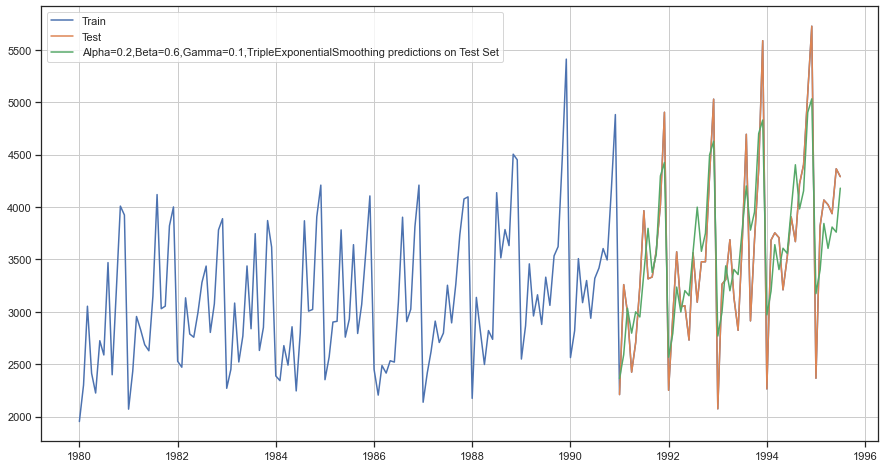

In [361]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Additive
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(15,8))
plt.plot(TES_train['Production'], label='Train')
plt.plot(TES_test['Production'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sa', 0.2, 0.6, 0.1], 
         label='Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();


In [362]:
resultsDf_6_1_rsme = pd.DataFrame({'Test RMSE': [resultsDf_6_1.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1_rsme])
resultsDf

Test RMSE
Linear Regression                                    898.172528
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
Alpha=0.1,SimpleExponentialSmoothing                 807.346865
Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 T...   819.401216
Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialS...   421.581209
Auto_ARIMA                                           831.615849
(3,1,3),(3,0,0,12),Auto_SARIMA                       429.436551
Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialS...   421.581209

## 2.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

#### Applying Augmented Dickey-Fuller test whether the series has unit and whether it is stationary or non-stationary.

Hypothesis for the ADF test:

H0 : The Time Series has a unit root and is thus non-stationary (Null Hypothesis)

H1 : The Time Series does not have a unit root and is thus stationary. (Alternate Hypothesis)

We see that for α = 5%, the Time Series is non-stationary.

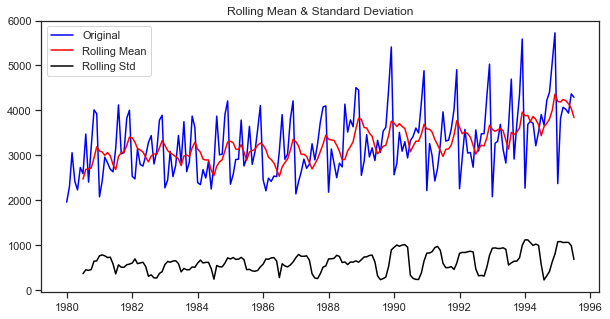

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [330]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(sdf['Production'])

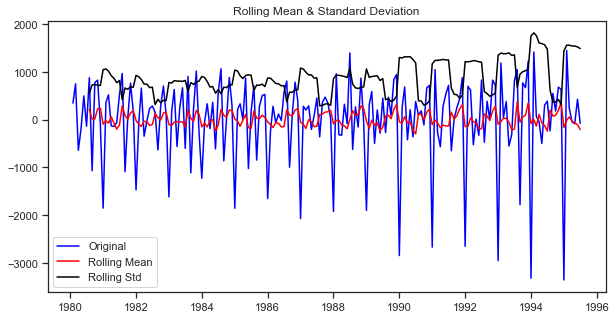

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [331]:
test_stationarity(sdf['Production'].diff().dropna())

### 2.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Auto - Arima Model

In [332]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [333]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [334]:
from statsmodels.tsa.arima.model import ARIMA

In [335]:
for param in pdq:
    ARIMA_model = ARIMA(train['Production'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211419
ARIMA(0, 1, 2) - AIC:2056.4892632434935
ARIMA(0, 1, 3) - AIC:2056.8317894192487
ARIMA(1, 1, 0) - AIC:2097.872121649042
ARIMA(1, 1, 1) - AIC:2061.5230839251226
ARIMA(1, 1, 2) - AIC:2056.7156820689147
ARIMA(1, 1, 3) - AIC:2058.7121590362085
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.1006718132676
ARIMA(2, 1, 2) - AIC:2058.712702099948


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3) - AIC:2057.088850688497
ARIMA(3, 1, 0) - AIC:2070.365367141181
ARIMA(3, 1, 1) - AIC:2058.3045460596163
ARIMA(3, 1, 2) - AIC:2060.6799657020474
ARIMA(3, 1, 3) - AIC:2059.5907686132427


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [336]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2   (0, 1, 2)  2056.489263
6   (1, 1, 2)  2056.715682
3   (0, 1, 3)  2056.831789
11  (2, 1, 3)  2057.088851
13  (3, 1, 1)  2058.304546
7   (1, 1, 3)  2058.712159
10  (2, 1, 2)  2058.712702
9   (2, 1, 1)  2059.100672
15  (3, 1, 3)  2059.590769
14  (3, 1, 2)  2060.679966
5   (1, 1, 1)  2061.523084
1   (0, 1, 1)   2069.59963
12  (3, 1, 0)  2070.365367
8   (2, 1, 0)  2073.234861
4   (1, 1, 0)  2097.872122
0   (0, 1, 0)  2103.733834

In [337]:
auto_ARIMA = ARIMA(train['Production'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                Sun, 25 Feb 2024   AIC                           2056.489
Time:                        17:20:55   BIC                           2065.115
Sample:                    01-01-1980   HQIC                          2059.994
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725      0.0

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



#### Predict on the Test Set using this model and evaluate the model.¶

In [338]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Production'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

831.6158492031099


In [339]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                    898.172528
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
Alpha=0.1,SimpleExponentialSmoothing                 807.346865
Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 T...   819.401216
Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialS...   421.581209
Auto_ARIMA                                           831.615849

#### SARIMA Model

In [340]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [341]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [342]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Production'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.2200937706539
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.549179365385


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4177.698829506
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.8662806996663
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238899287
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.5155744481376


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:1809.9028871196765
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283981945
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553716


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4282.991447990855
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1431.8195214429536
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1433.683634512327
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1435.6483732860188


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3552.5581294145545
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783908047
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.536969484309
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750451813
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3763.4839610596528
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850254
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.7997311032084
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.691431558537
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3783.37372475669
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994170612
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.2120753821891
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659303435


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3771.319704535076
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1391.515931390393
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1391.6784806927615
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1393.2542232020155


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:4060.21218448596
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2008.7530085409794
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1762.3734963549266
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1560.8259136546837


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3712.8894566656977
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1744.3330844654222
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1684.9857149264947
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1518.2293806296188
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3758.930835716317
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1564.2964670213628
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1559.402247047159
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1517.2079034678977


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3590.522581045278
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1392.0923895476276
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1392.8896916023023
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1394.6785433049401


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3589.790717613306
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1992.4491478146074
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1749.3536183877916
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1548.9937425991961


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:4291.306801699064
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1746.24930172444
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1673.7768561923347
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1506.7422208343949


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:4028.268810153202
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1566.201920527805
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1561.2942418010655
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1505.635099104352


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3938.147288570257
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1394.046151663476
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1394.8217251488434
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1396.619515517412


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3628.3551012870207
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2082.346293203914
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1830.795938086213
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1619.1692193111728


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3741.6756636797218
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1762.6869226701044
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1746.0344548569992
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1573.3986023936864


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:4099.524317806532
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1575.3766146707344
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1574.304375393327
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1572.7118411389358


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3785.6955941683545
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1403.9062790897074
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1404.8772929476636
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1405.6815285539062
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3894.4461376625195
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2026.5294817471058
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1779.6139226874266
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1575.1200609599416


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3603.1683612294682
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1730.659784953246
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1699.171402804636
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1531.8681036855437


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4097.895200033732
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1546.3906446336052
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1544.9713267974746
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1530.6567519557611


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3228.037784160406
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1378.1108269763251
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1379.4108640335755
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1381.1161858663024


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3898.7391652153215
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2006.7462276367642
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1763.757044515549
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1561.8449998639671


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3152.2533072705332
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1734.417757969477
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1686.9458101660252
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1519.1970127247673


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3643.6595786812954
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1548.280776328998
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1546.5002759962629
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1518.3289775468324


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3623.052741414321
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1379.4891002247116
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1380.6334397282803
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1382.1717826986073


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3480.071897263818
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1993.7636078591497
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1751.2084914435004
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1549.147152228869


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3532.9481135312094
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1734.0453037033262
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1675.7561332752268
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1507.6931784501064


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:4396.1966757747
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1550.232595874918
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1548.8140562055876
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1506.5836176784408


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:4259.8040424014125
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1381.4552235600388
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1382.6329684356103
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1384.1703870349158
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3718.2091958144165
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2040.0704103507978
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1814.1583482027263
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1607.6892013977176


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3884.3201634811076
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1738.2500720137975
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1717.8744470685397
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1561.902135305243


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3731.0472136924595
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1547.9158672872356
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1546.9578751839135
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1546.8665186645853


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:4030.449949505686
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1378.7471567487673
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1379.6405722445386
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1380.8247105541295


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3941.885278553597
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2024.445662637799
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1778.6762974900375
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1577.0337158650782


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3502.734980362975
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1717.9115930473085
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1700.7853241104797
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1533.792241915711


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:4066.0698566708265
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1534.5085119807047
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1533.0523649851073
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1532.6514995813359
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3797.2640277777473
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1366.4702945425936
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1367.791404119168
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1369.524424058248


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3816.516056332112
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2008.472196606042
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1765.3249456572432
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1562.7783504905979


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3063.284139221217
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1717.5426781589595
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1688.8429650256858
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1521.191004726947


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2932.6963603486206
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1535.9388543560642
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1534.024086186864
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1520.3136558019228


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2924.9033700971017
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1367.7234168166626
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1369.0617774586847
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1370.602825790005


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3263.1875229921725
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1992.3012284975123
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1752.3850844251322
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1549.9198357883236


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3233.171862806017
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1721.4245981161744
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1675.88232357741
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1508.898540088907


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4421.989980810624
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1536.820409487287
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1535.9951828297392
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1503.6015616892896


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3719.671841007871
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1365.4462862952803
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1371.0596329990656
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1369.156444899452


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3767.7138250625803
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2022.4138558163286
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1812.401318224866
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1605.2419625146251


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3835.5136789206986
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1719.7443958496121
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1698.4787581835426
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1558.4832687860637


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3810.6099968374497
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1529.3615128839651
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1528.795827974531
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1529.2886327219544


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3780.817281553377
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1361.0088098539338
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1362.4041811612299
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1363.992670169525


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3571.874009772056
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2007.4611617780724
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1780.1012202812353
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1578.5247711676273


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3522.439936994334
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1705.382885782736
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1688.4931407972117
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1535.5165931870515


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4068.069856670819
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1522.0154632253361
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1520.954893895918
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1520.7674144833597
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3799.2640277777173
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1354.2469241424633
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1355.6420787233028
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1357.2774013429769


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3519.3743689970916
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2009.4528876109987
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1768.6803008006111
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1564.7531774700951


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:2598.6427763217616
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1707.0364939450837
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1689.8221376691815
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1522.916890433586


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3403.9806750927673
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1523.9294267501036
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1522.2640782447215
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1521.8279691605746


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3439.9649436561026
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1355.7661432909726
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1357.1145372562414
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1358.5071102205316


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3290.4164081628337
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1975.5864017334
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1753.475892763731
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1546.6556563467454


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3917.234182568437
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1707.9067414049948
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1676.4618298963403
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1506.8447850126138


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3849.2131243210074
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1526.8621838387226
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1522.77673479352
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1508.1162775506102


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3970.4653600630227
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1350.3160022908507
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1356.9789985102966
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1356.6623710747617
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3275.5552850851436


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [343]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
252  (3, 1, 3)  (3, 0, 0, 12)  1350.316002
220  (3, 1, 1)  (3, 0, 0, 12)  1354.246924
221  (3, 1, 1)  (3, 0, 1, 12)  1355.642079
236  (3, 1, 2)  (3, 0, 0, 12)  1355.766143
254  (3, 1, 3)  (3, 0, 2, 12)  1356.662371

In [344]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Production'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood                -665.158
Date:                             Sun, 25 Feb 2024   AIC                           1350.316
Time:                                     17:33:00   BIC                           1375.534
Sample:                                          0   HQIC                          1360.494
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9032      0.152      5.933      0.000       0.605       1.202
ar.L2         -0.9168      

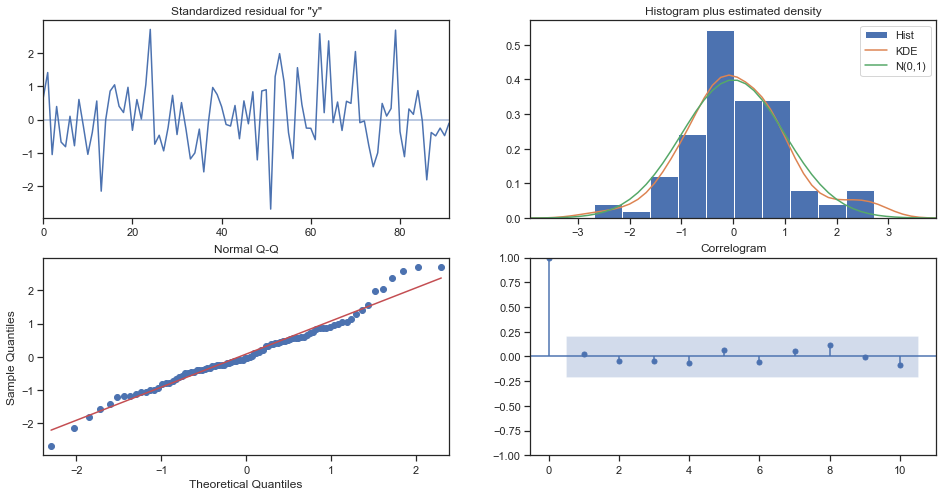

In [345]:
results_auto_SARIMA_6.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [346]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2746.567006  324.263634    2111.021962    3382.112049
1  3111.832195  325.922529    2473.035777    3750.628613
2  3418.111831  330.137015    2771.055173    4065.168490
3  2978.676523  345.820604    2300.880594    3656.472451
4  3299.157395  352.875979    2607.533185    3990.781604

In [347]:
rmse = mean_squared_error(test['Production'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

429.4365509770729


In [348]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,3),(3,0,0,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                    898.172528
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
Alpha=0.1,SimpleExponentialSmoothing                 807.346865
Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 T...   819.401216
Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialS...   421.581209
Auto_ARIMA                                           831.615849
(3,1,3),(3,0,0,12),Auto_SARIMA                       429.436551

### 2.7 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [349]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.2,Beta=0.6,Gamma=0.1,TripleExponentialS...   421.581209
(3,1,3),(3,0,0,12),Auto_SARIMA                       429.436551
Alpha=0.1,SimpleExponentialSmoothing                 807.346865
Alpha = 0.1464, Beta = 0.0399, Gamma = 0.2626 T...   819.401216
Auto_ARIMA                                           831.615849
Linear Regression                                    898.172528
Simple Average Model                                 934.353358
Naive Model                                         1519.259233

### 2.8 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [350]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [351]:
future_predictions=pd.DataFrame(columns=['Production_Preds'],index=date)

In [352]:
TES_train = sdf.copy()

In [353]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Production'],trend='additive',seasonal='additive')
alpha=0.2
beta=0.6
gamma=0.1
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [354]:
future_predictions['Production_Preds']=prediction
future_predictions

Production_Preds
1995-08-01       4894.949815
1995-09-01       4650.259062
1995-10-01       4958.306778
1995-11-01       5750.734987
1995-12-01       6261.721837
1996-01-01       3921.951564
1996-02-01       4659.263043
1996-03-01       5000.732030
1996-04-01       4843.913920
1996-05-01       4907.651876
1996-06-01       5005.094416
1996-07-01       5549.053625

In [355]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  4101.686038  4894.949815  5688.213591
1995-09-01  3856.995286  4650.259062  5443.522839
1995-10-01  4165.043002  4958.306778  5751.570555
1995-11-01  4957.471210  5750.734987  6543.998763
1995-12-01  5468.458061  6261.721837  7054.985614

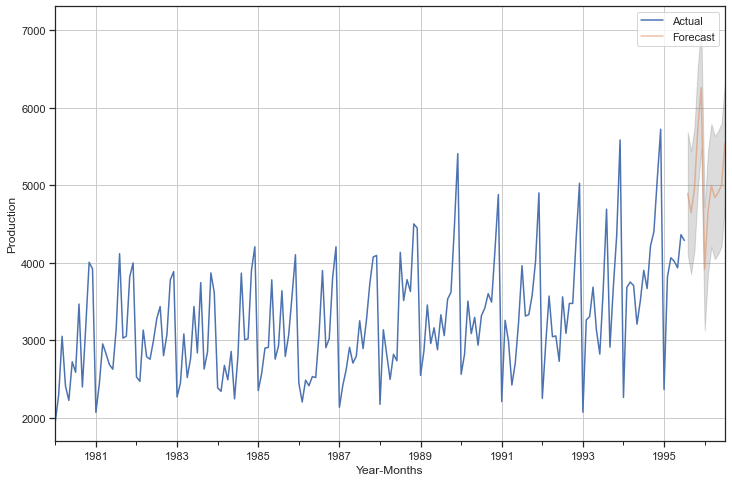

In [356]:
# plot the forecast along with the confidence band

axis = sdf['Production'].plot(label='Actual', figsize=(12,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Production')
plt.legend(loc='best')
plt.grid()
plt.show()